<a href="https://colab.research.google.com/github/RupeshSharma14/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [27]:
# Importing data analysis and visualisation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from google.colab import drive

%matplotlib inline

In [28]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

# **Reading the data**

In [29]:
# Mounting the google drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Loading the dataset

path = "/content/drive/MyDrive/Online Retail Customer Segmentation/Online Retail.xlsx"
retail_df = pd.read_excel(path)

In [31]:
# Displaying the first five rows of the dataset

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
# Displaying the last five rows of the dataset

retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [33]:
# Size of the dataset

retail_df.shape

(541909, 8)

The dataset consists of 541909 rows and 8 columns.

In [34]:
# Checking for duplicate rows in the dataset

retail_df.duplicated().sum()

5268

There are 5268 duplicate rows in the dataset.

In [35]:
# Dropping the duplicate rows of the dataset

retail_df.drop_duplicates(inplace = True)

In [36]:
# Checking for any Null values

retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

CustomerID and Description features contain Null values.

In [54]:
# Dropping Null values present in the dataset

retail_df.dropna(inplace = True)

In [61]:
# Size of the dataset after removing Null values

retail_df.shape

(392732, 8)

In [55]:
# Checking the data type of variables

retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [56]:
# Descriptive Summary

retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# **Exploratory Data Analysis**

**Number of unique customers**

In [79]:
print(f"Number of unique customers: {retail_df.CustomerID.nunique()}")

Number of unique customers: 4339


**Number of unique products**

In [78]:
print(f"Number of unique products: {retail_df.StockCode.nunique()}")

Number of unique products: 3665


**Number of unique countries**

In [77]:
print(f"Number of unique countries: {retail_df.Country.nunique()}")

Number of unique countries: 37


**Top 5 countries with most number of orders**

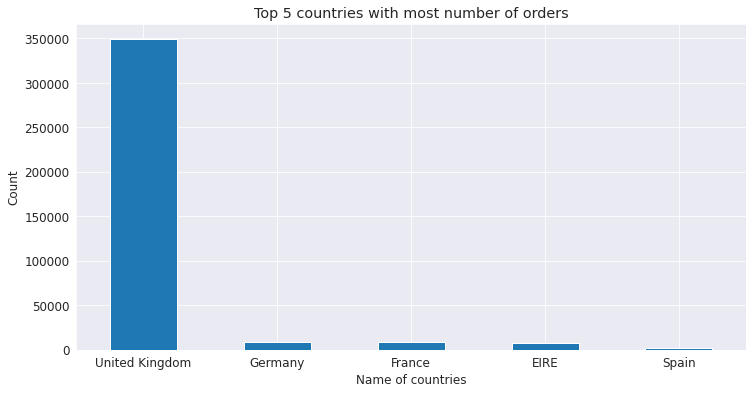

In [84]:
retail_df["Country"].value_counts().head().plot(kind = "bar")
plt.title("Top 5 countries with most number of orders")
plt.xlabel("Name of countries")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

The above visualisation shows that the majority of orders come from the United Kingdom, followed by Germany and France, indicating that Online Retail Marketing is very common in Europe.

**Top 5 countries with least number of orders**

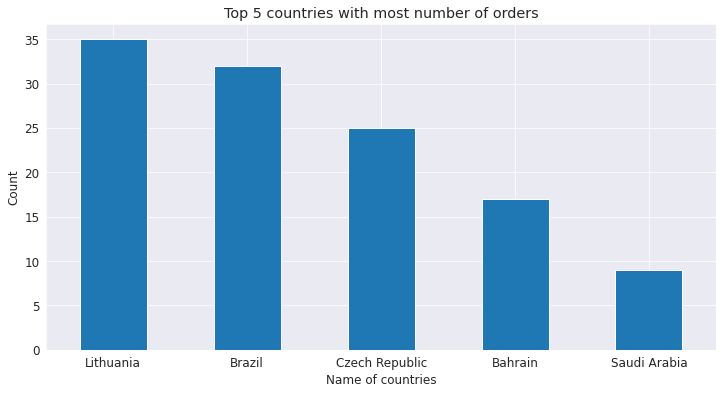

In [85]:
retail_df["Country"].value_counts().tail().plot(kind = "bar")
plt.title("Top 5 countries with least number of orders")
plt.xlabel("Name of countries")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

According to the above visualisation, Online Retail Marketing has very few customers from the Middle East.